<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/01_adsales_prediction_app_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

01 Advertising to Sales Prediction App
===


# Import Packages

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import joblib

# Load Data

In [13]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/Deployment/adsales_app/advertising_regression.csv', index_col=0, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
data.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

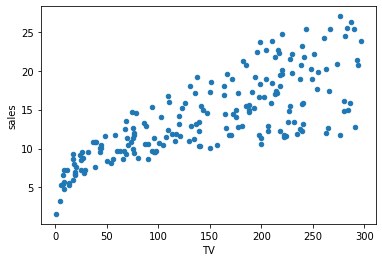

In [15]:
data.plot.scatter(x='TV',y='sales')

# Train Machine Learning Model

In [16]:
# Define Features
features = ['TV', 'radio', 'newspaper']

# Set X
X = data[features]

# Set y
y = data['sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Initialize model
model = LinearRegression() 

# Fit Model
model.fit(X_train, y_train)

LinearRegression()

# Model Metrics

In [17]:
from sklearn.metrics import r2_score,mean_absolute_error

print("r2: ", r2_score(y_test, model.predict(X_test))) # closer to 1 is good. that means the model is able to fit
print("MAE: ", mean_absolute_error(y_test, model.predict(X_test))) # closer to 0 is good. that means the predicted value from the actual value is not far off

r2:  0.8643416063882411
MAE:  1.4259694785966037


# Save The Model

In [18]:
filename = 'adsales_linearregression.mdl'
joblib.dump(model, filename)

['adsales_linearregression.mdl']

# Starting Streamlit

open your console ie. terminal in linux, command prompt in windows (note: if you are using anaconda, make sure to use the built in command prompt)

make sure that streamlit is installed

> pip install streamlit

Afterwards, `cd` into the **adsales_app** directory of `app.py` and run this on the terminal:

> streamlit run app.py
